# Imports

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

# Main Script

In [11]:
# load parameter sets 
param_sets_df = pd.read_csv('Data/BNGL_pSTAT_simulations/param_sets.csv', header=0)

# remove SOCS and cytokine stimulation parameters (known parameters)
param_sets_df = param_sets_df.drop(['SOCS3_0','SOCS1_0','L1_0','L2_0'],axis=1)

# remove duplicate parameter sets (every set of 6 parameter sets only differ due to cytokine stimulation)
param_sets_df = param_sets_df.drop_duplicates()

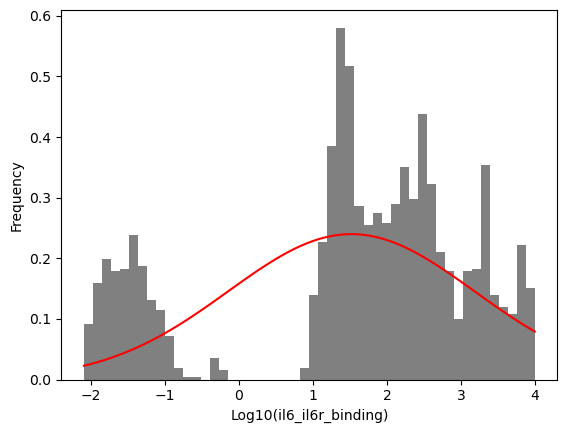

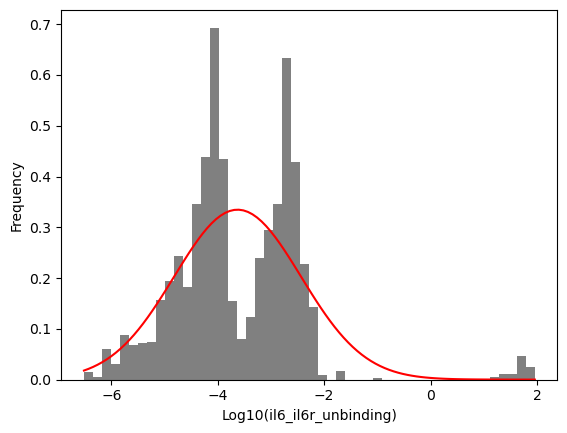

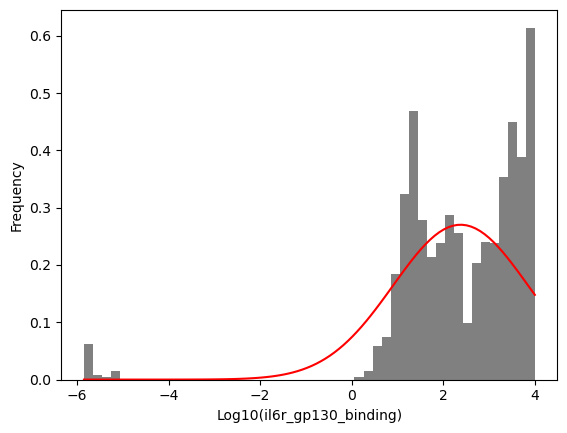

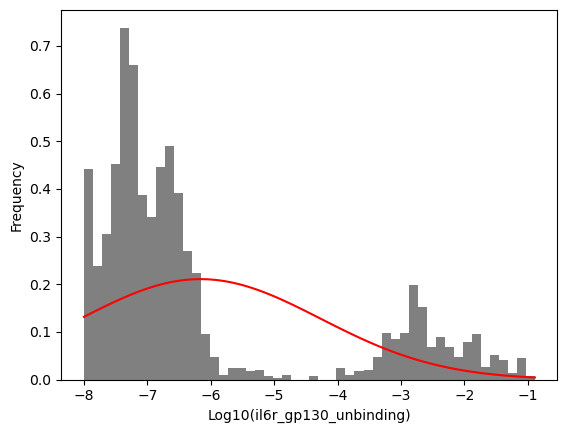

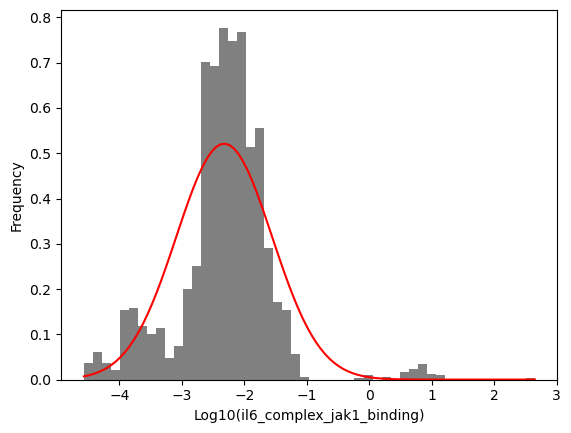

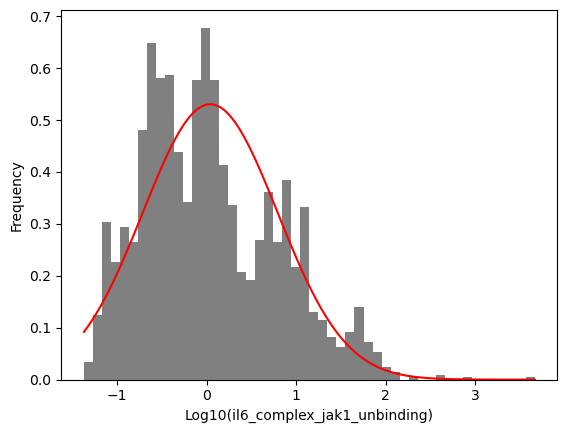

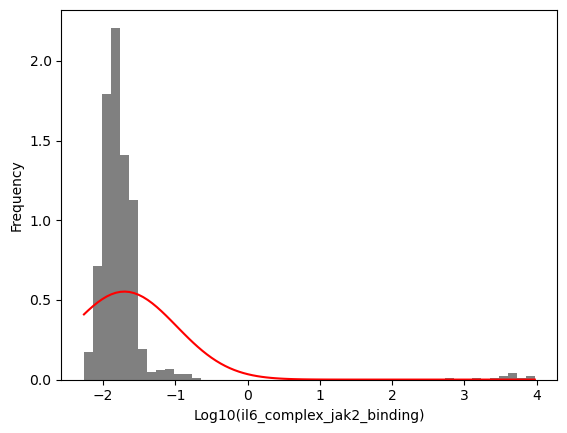

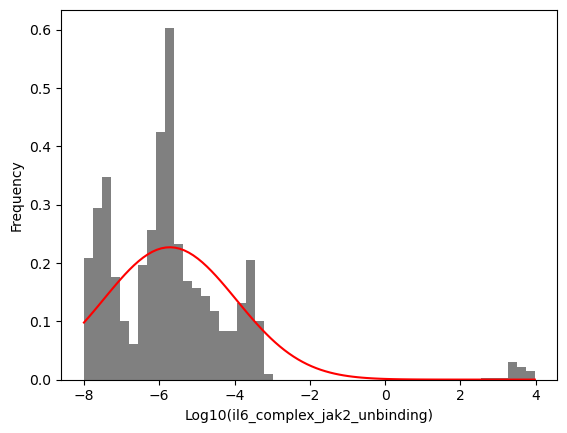

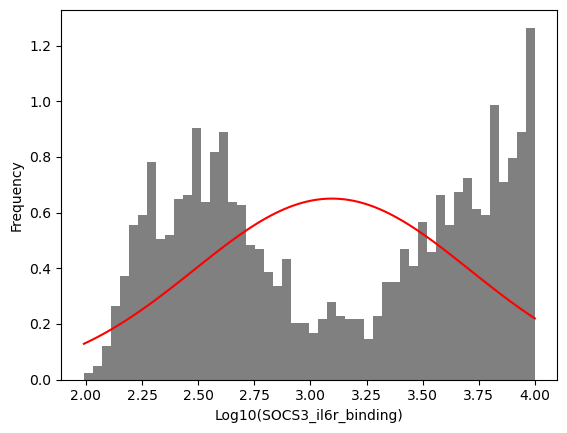

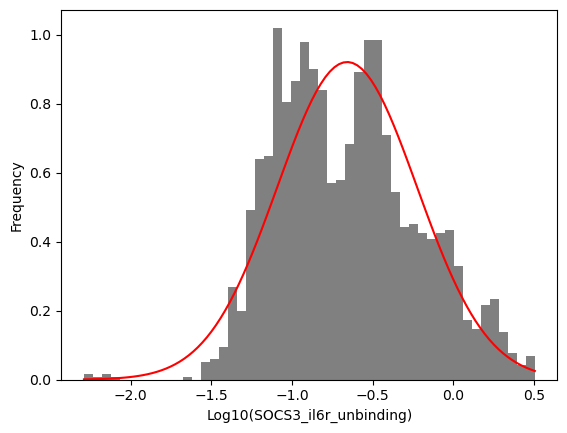

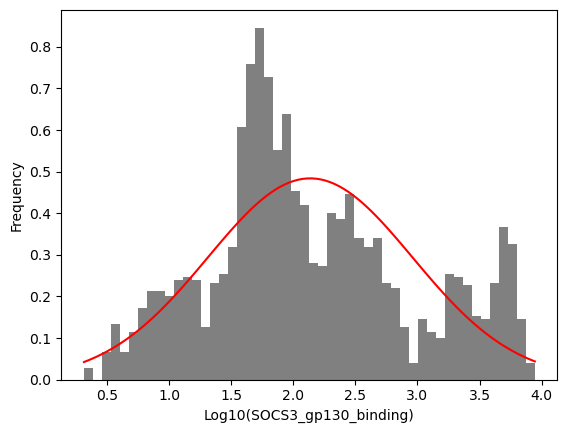

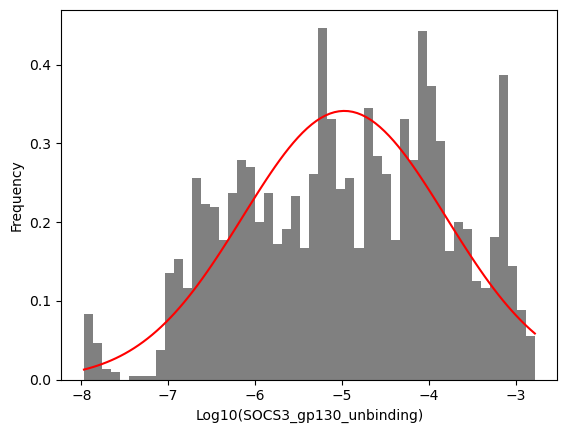

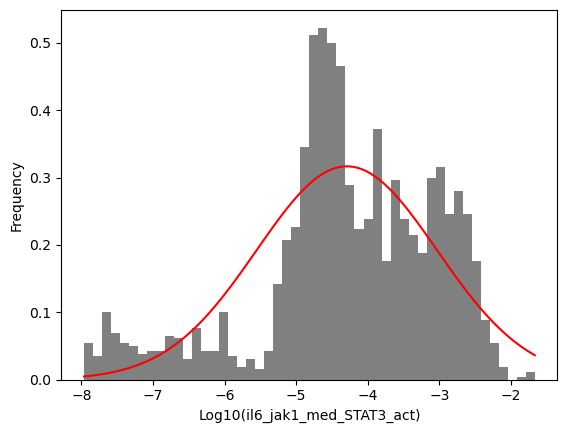

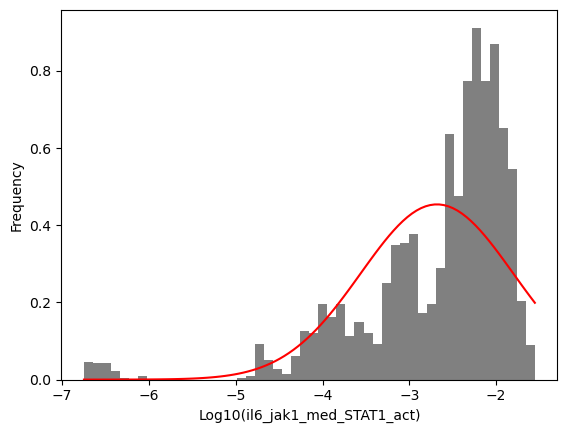

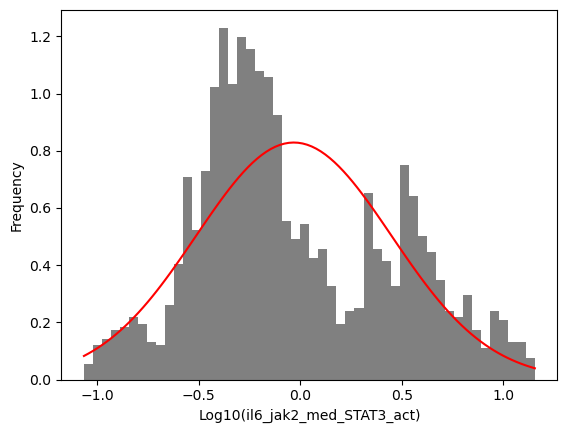

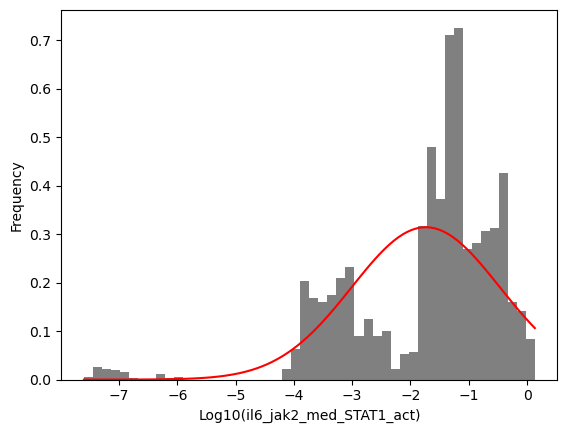

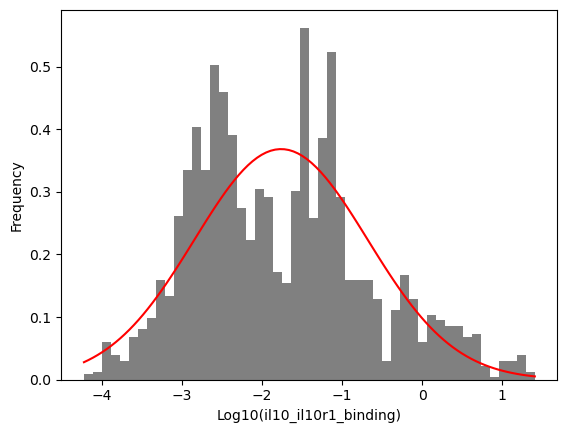

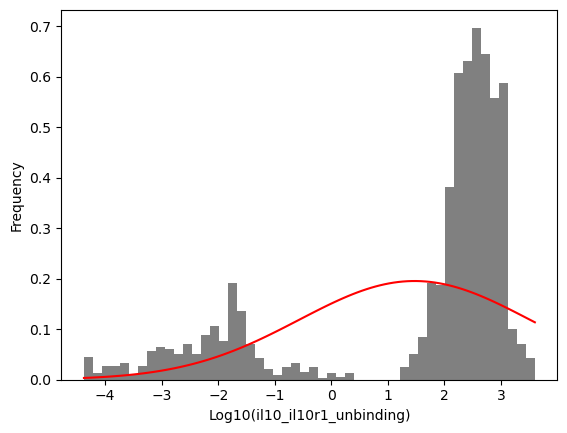

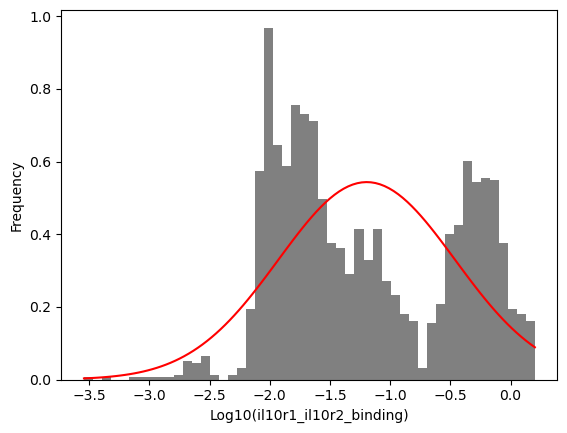

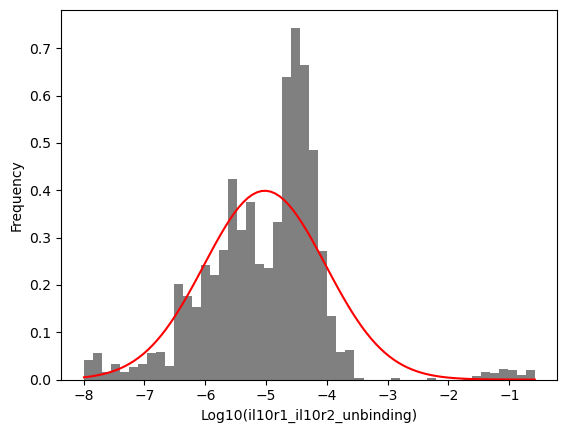

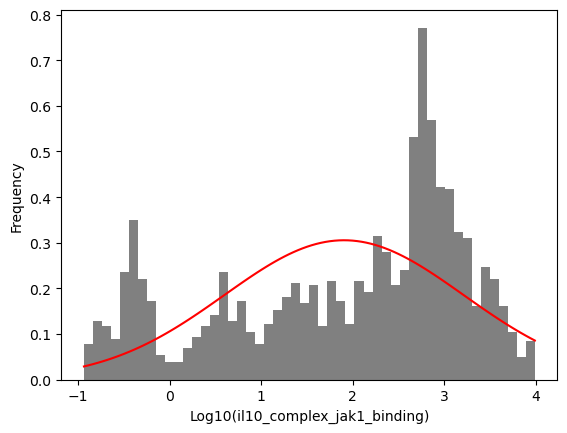

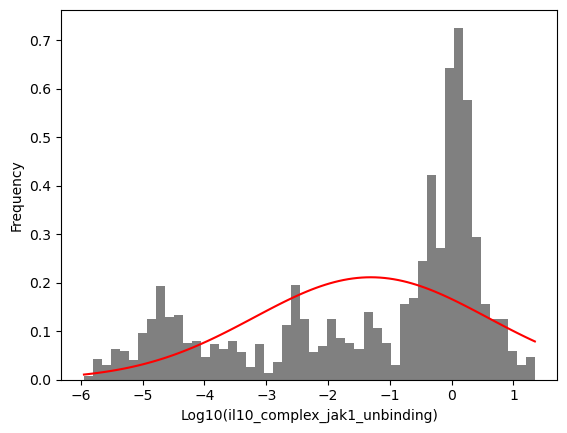

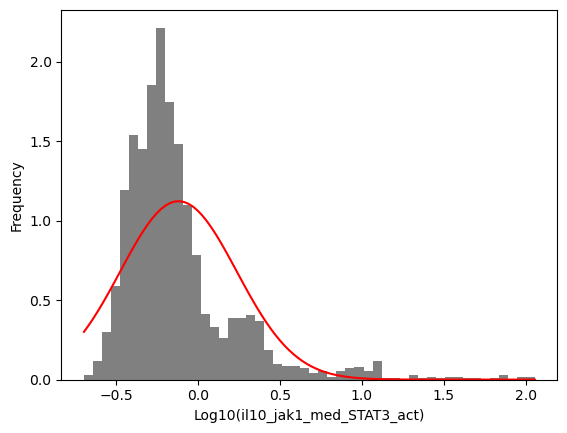

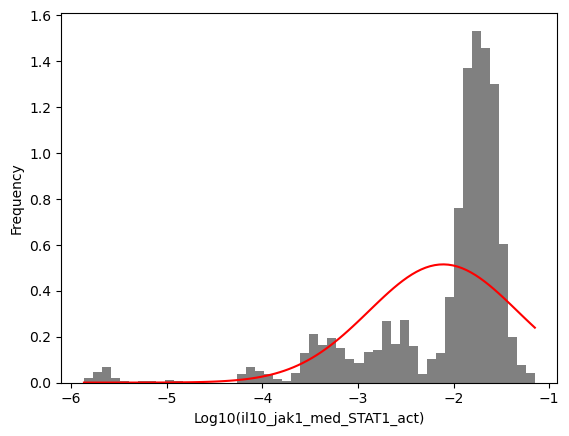

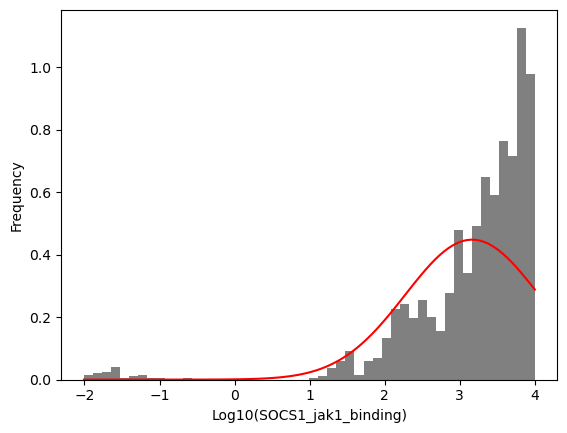

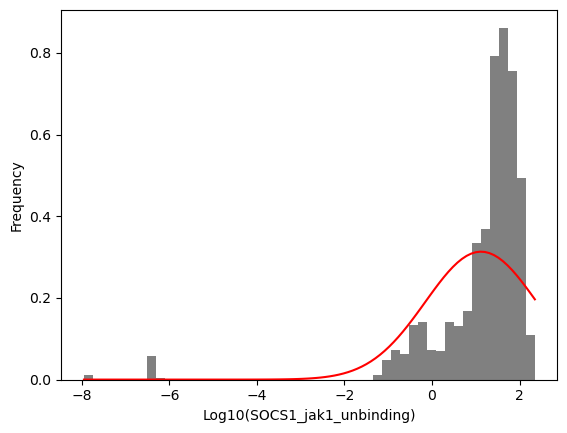

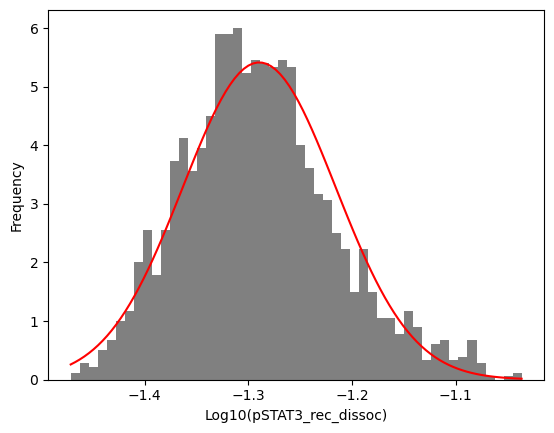

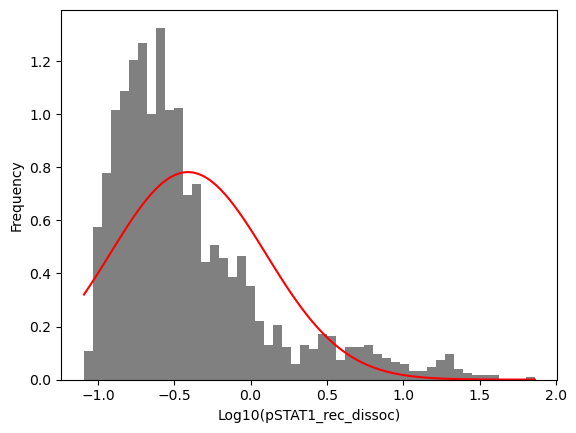

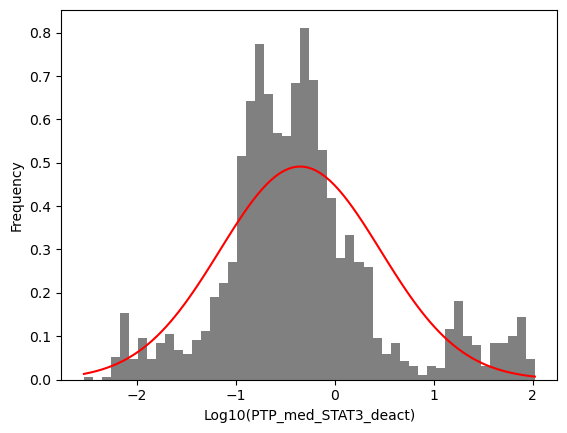

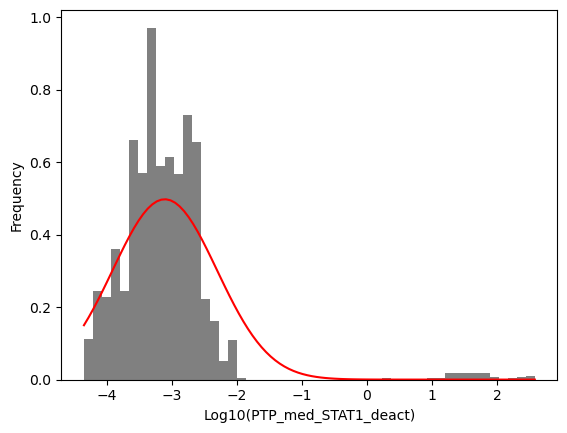

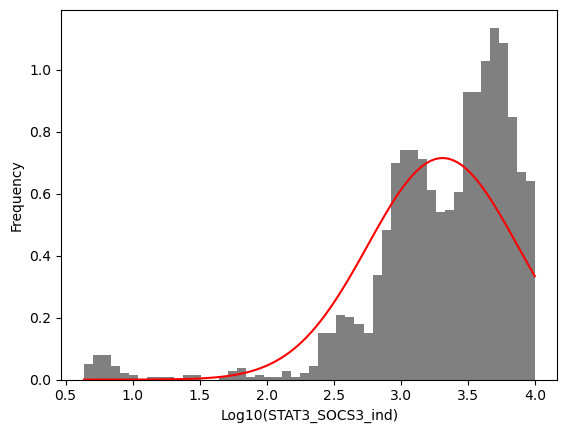

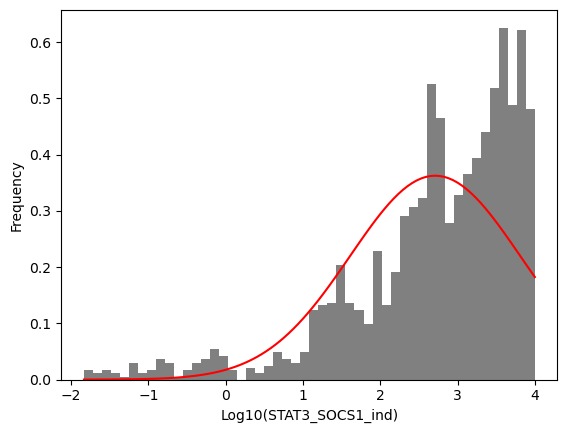

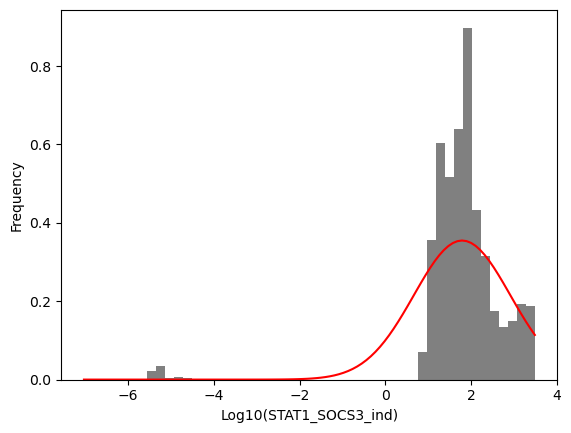

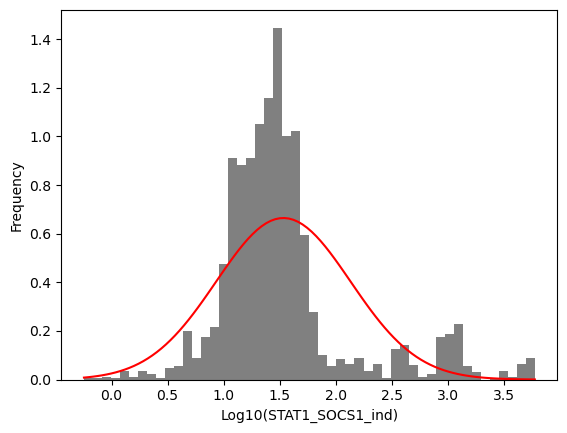

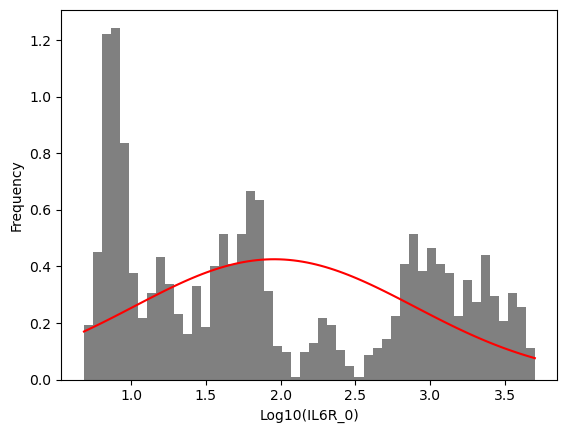

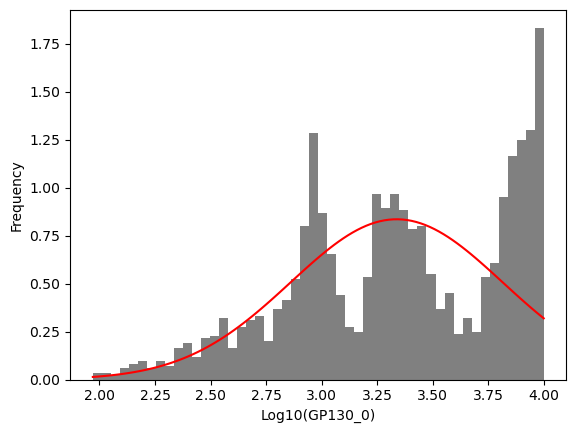

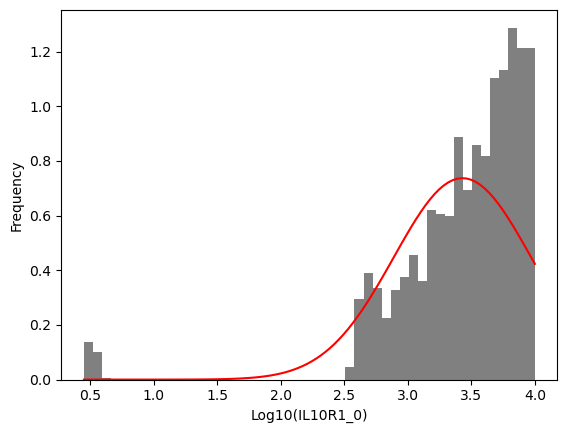

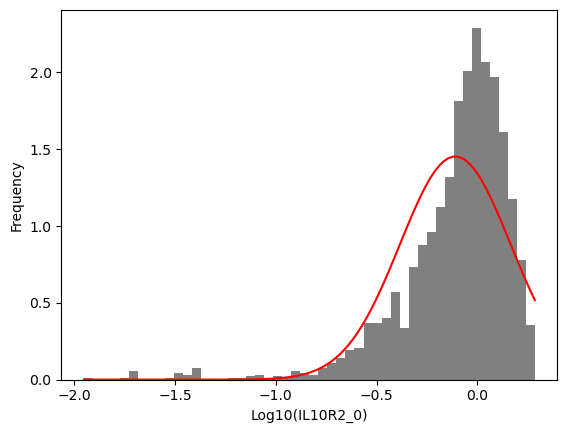

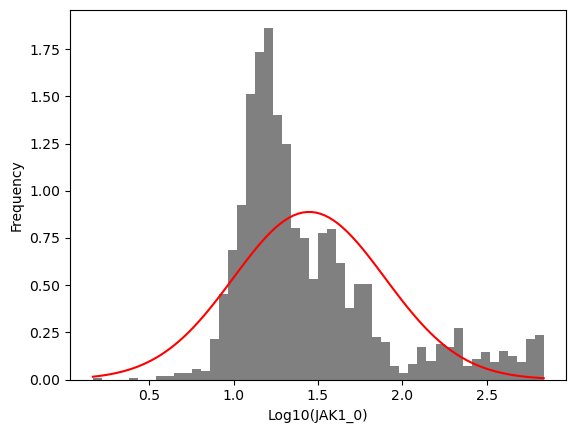

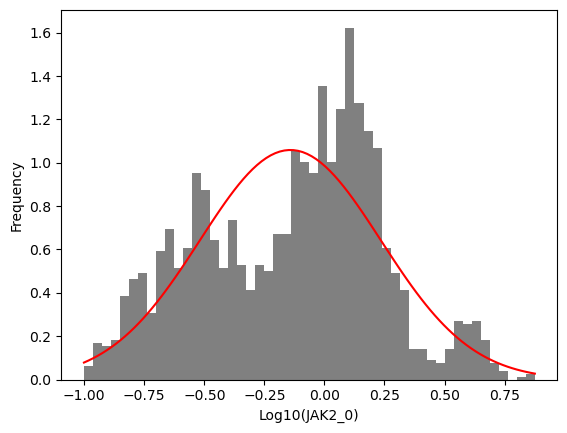

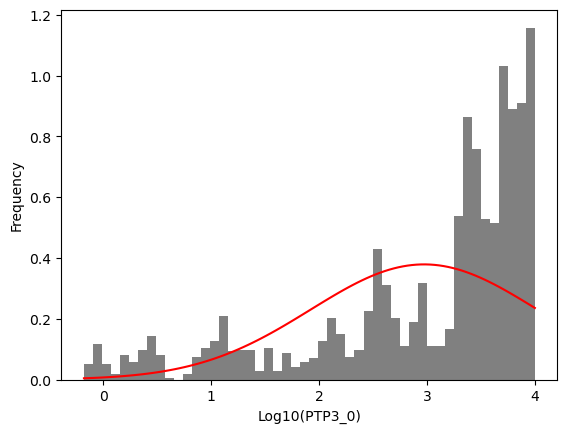

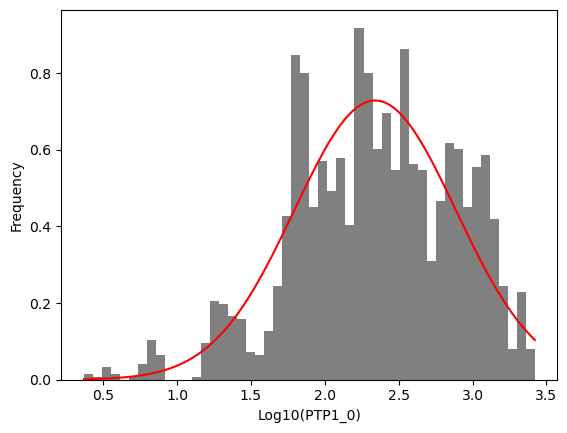

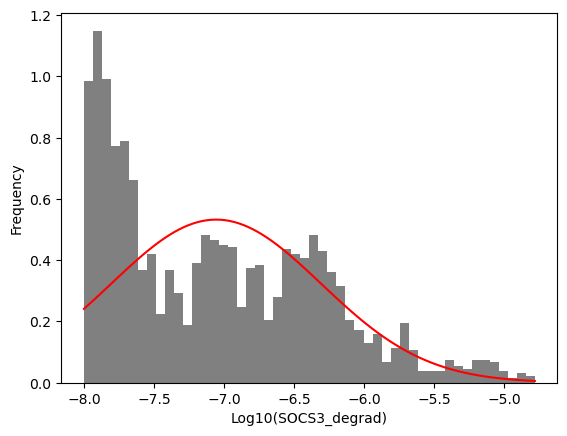

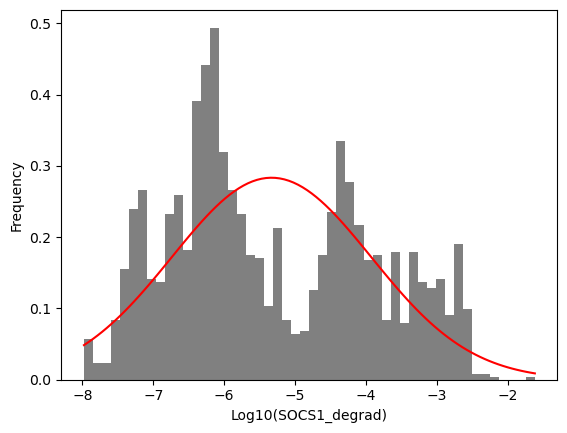

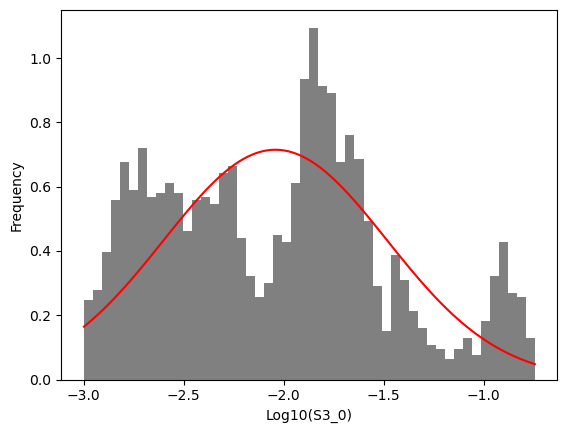

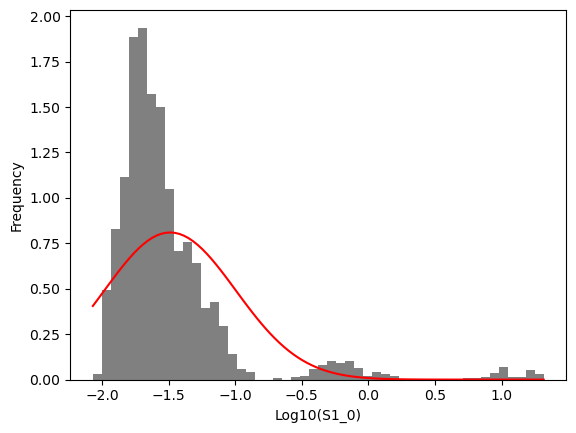

In [13]:
# plot log10 parameter distributions with normal curve fitted on top
for i in range(param_sets_df.shape[1]):
    mu = np.mean(np.log10(param_sets_df.iloc[:,i]))
    sigma = np.std(np.log10(param_sets_df.iloc[:,i]))
    dist_x = np.linspace(np.log10(param_sets_df.iloc[:,i]).min(),np.log10(param_sets_df.iloc[:,i]).max(),100)

    plt.figure(facecolor='white')
    v,b,p = plt.hist(np.log10(param_sets_df.iloc[:,i]),bins=50,color='gray',density=True)
    plt.plot(dist_x, stats.norm.pdf(dist_x, mu, sigma),color='red')
    plt.xlabel('Log10(' + param_sets_df.columns[i] + ')')
    plt.ylabel('Frequency')
    plt.show()

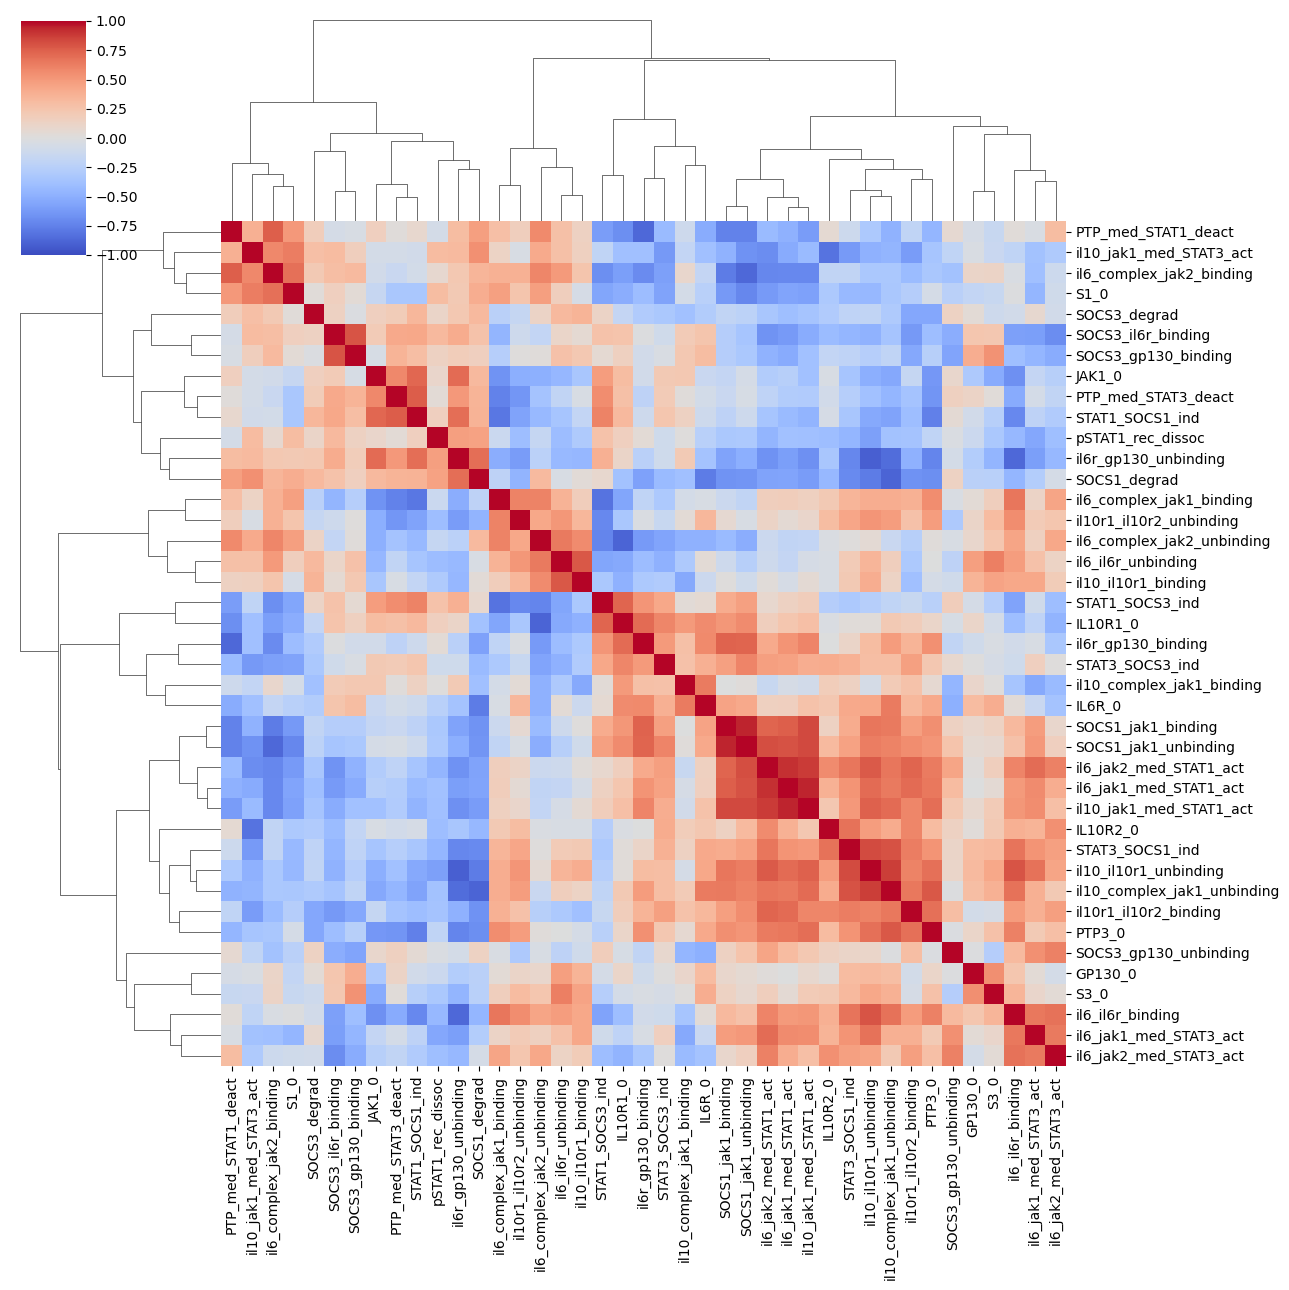

In [18]:
# drop constrained parameters for further analysis
reduced_data_df = param_sets_df.drop(['il6_complex_jak1_unbinding','pSTAT3_rec_dissoc','PTP1_0','SOCS3_il6r_unbinding','JAK2_0'],axis=1)

# calculate parameter correlations 
log10_corr_df = pd.DataFrame(np.corrcoef(np.log10(reduced_data_df.T)))
log10_corr_df.columns = reduced_data_df.columns
log10_corr_df.index = reduced_data_df.columns

# clustermap of correlations
rbcmap = sns.color_palette("coolwarm", as_cmap=True)
sns.clustermap(log10_corr_df,method='complete',vmin=-1,cmap=rbcmap,figsize=(13,13))
plt.show()